In [41]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [42]:
# Declaring Constants
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [43]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [44]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [45]:
# Test and Train Image Paths
trainImgDir = "/content/drive/MyDrive/HOT_OSM/train/images"
testImgDir = "/content/drive/MyDrive/HOT_OSM/test/images"

In [46]:
# Getting image names 
import glob
train_image_names = glob.glob(trainImgDir +"/*png")
print(train_image_names)

['/content/drive/MyDrive/HOT_OSM/train/images/1297.png', '/content/drive/MyDrive/HOT_OSM/train/images/451.png', '/content/drive/MyDrive/HOT_OSM/train/images/1594.png', '/content/drive/MyDrive/HOT_OSM/train/images/1368.png', '/content/drive/MyDrive/HOT_OSM/train/images/227.png', '/content/drive/MyDrive/HOT_OSM/train/images/1199.png', '/content/drive/MyDrive/HOT_OSM/train/images/1285.png', '/content/drive/MyDrive/HOT_OSM/train/images/1540.png', '/content/drive/MyDrive/HOT_OSM/train/images/706.png', '/content/drive/MyDrive/HOT_OSM/train/images/196.png', '/content/drive/MyDrive/HOT_OSM/train/images/1413.png', '/content/drive/MyDrive/HOT_OSM/train/images/1356.png', '/content/drive/MyDrive/HOT_OSM/train/images/1004.png', '/content/drive/MyDrive/HOT_OSM/train/images/498.png', '/content/drive/MyDrive/HOT_OSM/train/images/614.png', '/content/drive/MyDrive/HOT_OSM/train/images/1250.png', '/content/drive/MyDrive/HOT_OSM/train/images/133.png', '/content/drive/MyDrive/HOT_OSM/train/images/1092.png'

In [47]:
hr_image = preprocess_image(train_image_names[7])

Saved as Original Image.jpg


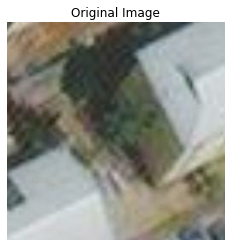

In [49]:
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [50]:
model = hub.load(SAVED_MODEL_PATH)

In [51]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 12.225677


Saved as Super Resolution.jpg


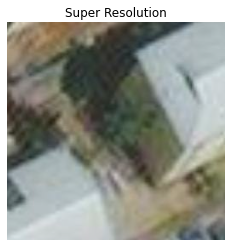

In [52]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")